# Week 3: Day 4 AM // CI/CD

What is MLOps?

MLOps could be narrowly defined as "the ability to apply DevOps principles to Machine Learning applications" however as we shall see shortly, this narrow definition misses the true value of MLOps to the customer. Instead, we define MLOps as “the extension of the DevOps methodology to include Machine Learning and Data Science assets as first class citizens within the DevOps ecology”.

MLOps should be viewed as a practice for consistently managing the ML aspects of products in a way that is unified with all of the other technical and non-technical elements necessary to successfully commercialise those products with maximum potential for viability in the marketplace. This includes DataOps, too, as machine learning without complete, consistent, semantically valid, correct, timely, and unbiased data is problematic or leads to flawed solutions that can exacerbate built-in biases.

In short, MLOps or ML Ops is a set of practices that aims to deploy and maintain machine learning models in production reliably and efficiently.

In this session we are using Continuous Machine Learning (CML). Continuous Machine Learning (CML) is an open-source library for implementing continuous integration & delivery (CI/CD) in machine learning projects. Use it to automate parts of your development workflow, including model training and evaluation, comparing ML experiments across your project history, and monitoring changing datasets.

## Getting Started with CML

1. Fork this project [repository](https://github.com/ardhiraka/h8_mlops).
2. To create a CML workflow, copy the following into a new file, `.github/workflows/cml.yaml`:

```yaml
name: CML
on: [push]
jobs:
  run:
    runs-on: ubuntu-latest
    container: docker://ghcr.io/iterative/cml:0-dvc2-base1
    steps:
      - uses: actions/checkout@v2
      - name: Train model
        env:
          REPO_TOKEN: ${{ secrets.GITHUB_TOKEN }}
        run: |
          pip install -r requirements.txt
          python train.py

          cat metrics.txt >> report.md
          cml publish plot.png --md >> report.md
          cml send-comment report.md
```

3. In your VSCode, edit line 16 of `train.py` to `depth = 5`.
4. Commit and push the changes:

```sh
git checkout -b experiment
git add . && git commit -m "modify forest depth"
git push origin experiment
```
5. In GitHub, open up a Pull Request to compare the experiment branch to master.

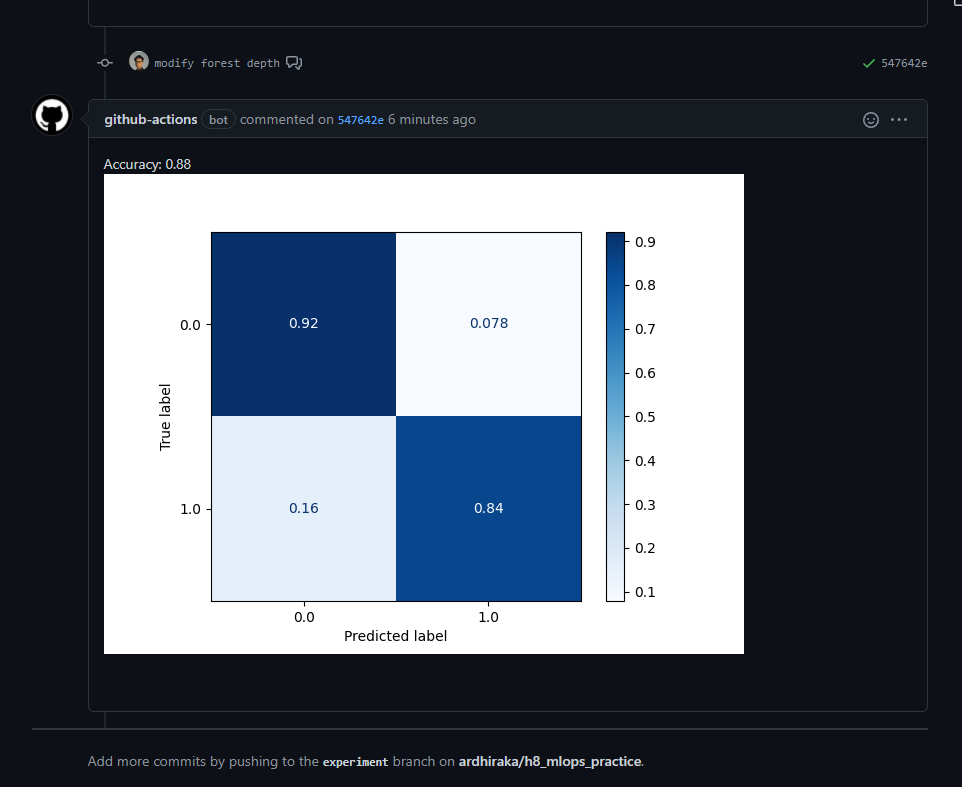

## Getting Started with DVC

Data Version Control, or DVC, is a data and ML experiment management tool that takes advantage of the existing engineering toolset that you're already familiar with (Git, CI/CD, etc.).

`pip install dvc`

Assuming DVC is already installed, let's initialize it by running dvc init inside a Git project.

`dvc init`

A few internal files are created that should be added to Git:

```sh
git status
Changes to be committed:
        new file:   .dvc/.gitignore
        new file:   .dvc/config
        ...
git commit -m "Initialize DVC"
```

Now we're ready to DVC.

Make a new folder on your google drive.

Run this command:
`dvc remote add -d myremote gdrive://<your-gdrive-url>`

You can find your gdrive url after the `folders/`, like for example in this url:
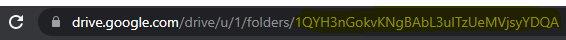



Commit your code with the regular commit command:

```sh
git add .
git commit -m 'add dvc config'
git push origin experiment
```

**Let's get the data**

Assuming that we have a large data. Copy to your repository. Any kind of data.

`dvc add data.csv`

and run `dvc push` to push your data to google drive.

To pull data from another computer, run `dvc pull data.csv`.